Imports 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


liver_canser_data = pd.read_csv('data_sets/synthetic_liver_cancer_dataset.csv')

#liver_canser_data.value_counts('age')
#age binn gebruiken anders klopt de leeftijd niet goed.

# data inspectie
liver_canser_data.head()



,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1


In [3]:
#controleer de opties binnen alcohol.
alcohol_consumption_variants = liver_canser_data.value_counts('alcohol_consumption')
alcohol_consumption_variants.head()

alcohol_consumption
Never         2014
Occasional    1967
Regular       1019
Name: count, dtype: int64

In [4]:

#maak een losse dataframe met de one-hot encoding en zet de bools om naar ints
liver_canser_one_hot_cols = pd.get_dummies(liver_canser_data[['alcohol_consumption', 'gender', 
                                                                  'physical_activity_level',
                                                                  'smoking_status']]).astype(int)

#verwijder de colomen van de one-hot encodig df uit de liver_cancer_data
liver_canser_data_drop_hot_cols = liver_canser_data.drop(columns=['alcohol_consumption', 'gender', 
                                                                  'physical_activity_level',
                                                                  'smoking_status'])
#voeg de df's weer samen
liver_canser_final = liver_canser_data_drop_hot_cols.join(liver_canser_one_hot_cols)

#laat de data zien na bewerkingen.
liver_canser_final.head()

,age,bmi,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,diabetes,liver_cancer,...,alcohol_consumption_Occasional,alcohol_consumption_Regular,gender_Female,gender_Male,physical_activity_level_High,physical_activity_level_Low,physical_activity_level_Moderate,smoking_status_Current,smoking_status_Former,smoking_status_Never
0,68,18.1,0,0,51.9,16.44,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
1,81,19.9,0,0,41.6,8.09,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
2,58,25.5,0,0,76.0,0.64,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,44,16.0,0,0,50.3,19.09,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,72,21.0,0,0,39.5,4.95,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0


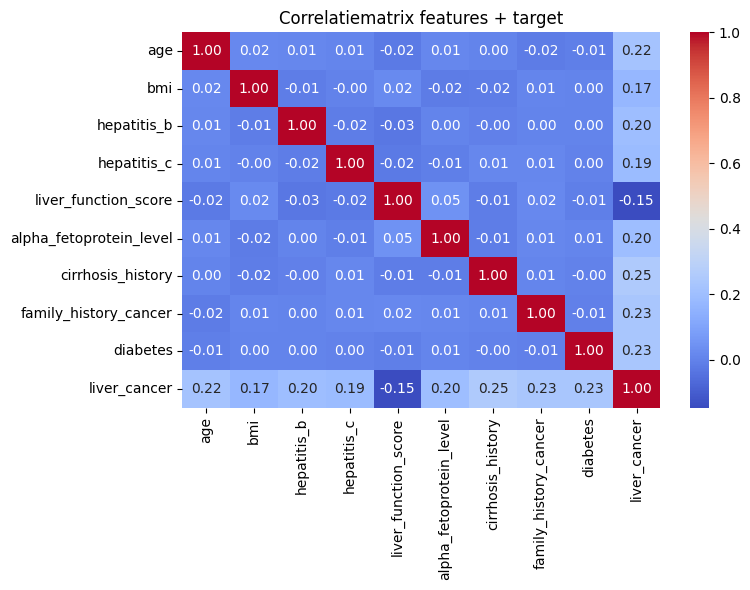

In [4]:
corr = liver_canser_data.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlatiematrix features + target")
plt.tight_layout()
plt.show()

In [5]:
x = liver_canser_final.drop(columns=['liver_cancer'])
y = liver_canser_final['liver_cancer']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=47,
    stratify=y
)

#lijst van modellen
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=47),
    'Random Forest': RandomForestClassifier(random_state=47),
    'Gradient Boosting': GradientBoostingClassifier(random_state=47),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=47)
}


results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    precision = precision_score(y_test, y_pred)
    results[name] = precision

In [6]:


# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

for name, precision in results.items():
    print(f"{name}: Precision = {precision:.2f}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression: Precision = 0.88
Accuracy: 0.786
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       782
           1       0.83      0.02      0.04       218

    accuracy                           0.79      1000
   macro avg       0.81      0.51      0.46      1000
weighted avg       0.80      0.79      0.70      1000

Random Forest: Precision = 0.99
Accuracy: 0.786
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       782
           1       0.83      0.02      0.04       218

    accuracy                           0.79      1000
   macro avg       0.81      0.51      0.46      1000
weighted avg       0.80      0.79      0.70      1000

Gradient Boosting: Precision = 1.00
Accuracy: 0.786
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       782
           1       0.83      0.02      0.04       218

    accuracy                

In [13]:
#voorspel met nieuwe data
new_data = pd.DataFrame([{
    'age': 84,
    'bmi': 25.5,
    'hepatitis_b': 0,
    'hepatitis_c': 0,
    'liver_function_score': 100,
    'alpha_fetoprotein_level': 10.3,
    'cirrhosis_history': 0,
    'family_history_cancer': 0,
    'diabetes': 0,
    'alcohol_consumption_Never': 1,
    'alcohol_consumption_Occasional': 0,
    'alcohol_consumption_Regular': 0,
    'gender_Female': 0,
    'gender_Male': 1,
    'physical_activity_level_High': 1,
    'physical_activity_level_Low': 0,
    'physical_activity_level_Moderate': 0,
    'smoking_status_Current': 0,
    'smoking_status_Former': 0,
    'smoking_status_Never': 1
}])

prediction = model.predict(new_data)
probability = model.predict_proba(new_data)  # kans op 0 of 1

print("Predicted class:", prediction[0])
print("Probability:", probability[0])


Predicted class: 0
Probability: [0.88725923 0.11274077]
